In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

file_name = 'Customer_Churn_Data_Large.xlsx'

sheets_to_read = ['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status']

data = pd.read_excel(file_name, sheet_name=sheets_to_read)

for sheet_name, df in data.items():
    print(f"Sheet: {sheet_name}")
    print(df.head(), "\n")


Sheet: Customer_Demographics
   CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low
3           4   21      M       Widowed         Low
4           5   21      M      Divorced      Medium 

Sheet: Transaction_History
   CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
0           1           7194      2022-03-27       416.50     Electronics
1           2           7250      2022-08-08        54.96        Clothing
2           2           9660      2022-07-25       197.50     Electronics
3           2           2998      2022-01-25       101.31       Furniture
4           2           1228      2022-07-24       397.37        Clothing 

Sheet: Customer_Service
   CustomerID  InteractionID InteractionDate InteractionType ResolutionStatus
0           1           6363      2022-03-31         Inquiry         Resolved
1   

In [3]:
# Merge the sheets based on 'CustomerID'
demographics = data['Customer_Demographics']
transactions = data['Transaction_History']
customer_service = data['Customer_Service']
online_activity = data['Online_Activity']
churn_status = data['Churn_Status']

# Merge step-by-step
merged_data = demographics.merge(transactions, on='CustomerID', how='left')\
                          .merge(customer_service, on='CustomerID', how='left')\
                          .merge(online_activity, on='CustomerID', how='left')\
                          .merge(churn_status, on='CustomerID', how='left')

print(merged_data.head())


   CustomerID  Age Gender MaritalStatus IncomeLevel  TransactionID  \
0           1   62      M        Single         Low           7194   
1           2   65      M       Married         Low           7250   
2           2   65      M       Married         Low           9660   
3           2   65      M       Married         Low           2998   
4           2   65      M       Married         Low           1228   

  TransactionDate  AmountSpent ProductCategory  InteractionID InteractionDate  \
0      2022-03-27       416.50     Electronics         6363.0      2022-03-31   
1      2022-08-08        54.96        Clothing         3329.0      2022-03-17   
2      2022-07-25       197.50     Electronics         3329.0      2022-03-17   
3      2022-01-25       101.31       Furniture         3329.0      2022-03-17   
4      2022-07-24       397.37        Clothing         3329.0      2022-03-17   

  InteractionType ResolutionStatus LastLoginDate  LoginFrequency ServiceUsage  \
0         I

In [4]:
merged_data.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [5]:
# Display summary statistics for numerical columns
print(merged_data.describe())

# Check data types and missing values
print(merged_data.info())


        CustomerID          Age  TransactionID                TransactionDate  \
count  6812.000000  6812.000000    6812.000000                           6812   
mean    500.169260    43.274516    5497.323253  2022-07-01 02:11:29.136817408   
min       1.000000    18.000000    1000.000000            2022-01-01 00:00:00   
25%     247.000000    30.000000    3223.500000            2022-04-02 00:00:00   
50%     505.500000    44.000000    5515.000000            2022-07-01 00:00:00   
75%     750.000000    56.000000    7675.250000            2022-09-30 00:00:00   
max    1000.000000    69.000000    9997.000000            2022-12-31 00:00:00   
std     286.704642    15.286788    2584.768541                            NaN   

       AmountSpent  InteractionID                InteractionDate  \
count  6812.000000    5204.000000                           5204   
mean    251.620527    5921.861261  2022-07-01 16:31:10.561106944   
min       5.180000    2015.000000            2022-01-01 00:00:00  

In [6]:
# Check for missing values in the interaction dataset before the join
print(customer_service.isnull().sum())


CustomerID          0
InteractionID       0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
dtype: int64


In [7]:
merged_data.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
MaritalStatus,0
IncomeLevel,0
TransactionID,0
TransactionDate,0
AmountSpent,0
ProductCategory,0
InteractionID,1608


In [8]:
churn_rate = .groupby('NoInteraction')['ChurnStatus'].mean()
print(churn_rate)


SyntaxError: invalid syntax (<ipython-input-8-eb9d6f3425a0>, line 1)

In [45]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(merged_data['NoInteraction'], merged_data['ChurnStatus'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")


Chi2: 7.642205863252646, p-value: 0.005701814761229092


In [8]:
merged_data.to_csv('output.csv', index=False)

In [9]:
merged_data['InteractionID'].fillna(0, inplace=True)  # Impute InteractionID with 0 (or "No Interaction")
merged_data['InteractionDate'].fillna("1900-01-01", inplace=True)  # Impute InteractionDate with a placeholder date
merged_data['InteractionType'].fillna("No Interaction", inplace=True)  # Impute InteractionType with "No Interaction"
merged_data['ResolutionStatus'].fillna("No Interaction", inplace=True)  # Impute ResolutionStatus with "No Interaction"

# 2. Create new column 'HasInteraction'
merged_data['HasInteraction'] = np.where(merged_data['InteractionID'] == 0, 0, 1)  # If InteractionID is 0, no interaction; else, interaction

# Display the resulting DataFrame
merged_data.head()

<ipython-input-9-0c08cac8384e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['InteractionID'].fillna(0, inplace=True)  # Impute InteractionID with 0 (or "No Interaction")
<ipython-input-9-0c08cac8384e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,HasInteraction
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0,1
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1


In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   object        
 9   InteractionID     6812 non-null   float64       
 10  InteractionDate   6812 non-null   datetime64[ns]
 11  InteractionType   6812 non-null   object        
 12  ResolutionStatus  6812 non-null   object        
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

In [11]:
# Ensure TransactionDate is in datetime format
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'], errors='coerce')

# Define the current date (latest date in your dataset or today)
current_date = pd.to_datetime('2022-12-31')  # Ensure current_date is a datetime object

# Perform groupby operation and aggregate the RFM metrics
rfm_data = merged_data.groupby('CustomerID').agg(
    Recency=('TransactionDate', lambda x: (current_date - x.max()).days),  # Recency: time since last interaction
    Frequency=('InteractionID', 'count'),  # Frequency: count of interactions (using InteractionID)
    Monetary=('AmountSpent', 'sum')  # Monetary: total amount spent
).reset_index()

# Print the resulting RFM DataFrame
print(rfm_data.head())




   CustomerID  Recency  Frequency  Monetary
0           1      279          1    416.50
1           2       42          7   1547.42
2           3       84          6   1702.98
3           4        4         10   1834.58
4           5       10          8   2001.49


In [12]:
# Check the distribution of Recency, Frequency, and Monetary
print(rfm_data['Recency'].describe())
print(rfm_data['Frequency'].describe())
print(rfm_data['Monetary'].describe())


count    1000.000000
mean       78.051000
std        78.720654
min         0.000000
25%        20.000000
50%        52.000000
75%       106.000000
max       355.000000
Name: Recency, dtype: float64
count    1000.000000
mean        6.812000
std         4.525388
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: Frequency, dtype: float64
count    1000.000000
mean     1714.039030
std      1254.228437
min        13.860000
25%       761.862500
50%      1463.405000
75%      2309.875000
max      6440.600000
Name: Monetary, dtype: float64


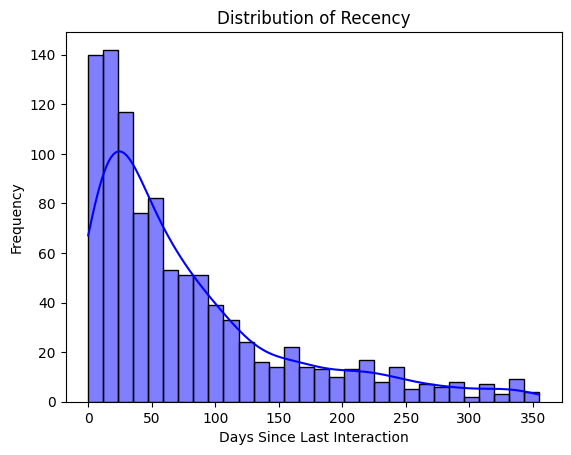

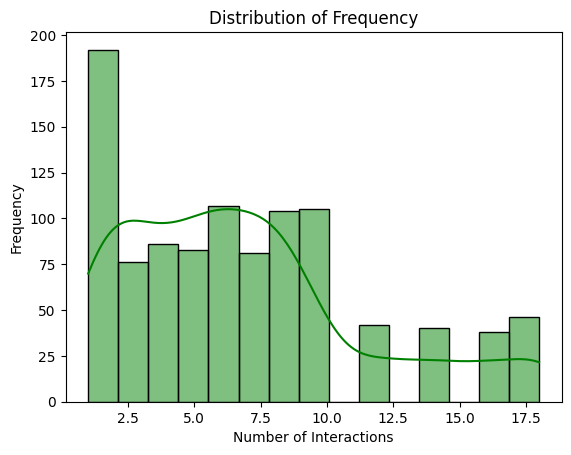

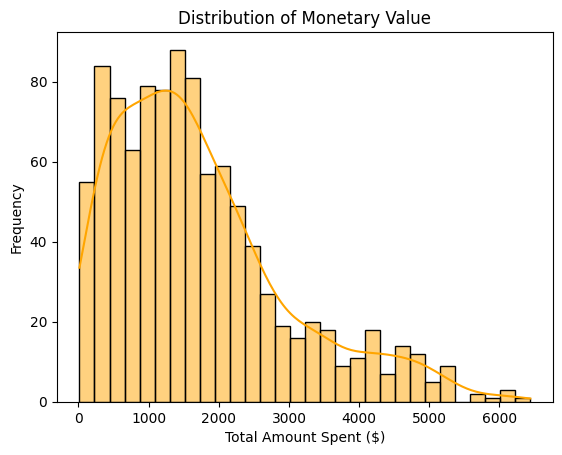

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency Distribution
sns.histplot(rfm_data['Recency'], bins=30, kde=True, color='blue')
plt.title('Distribution of Recency')
plt.xlabel('Days Since Last Interaction')
plt.ylabel('Frequency')
plt.show()

# Frequency Distribution
sns.histplot(rfm_data['Frequency'], bins=15, kde=True, color='green')
plt.title('Distribution of Frequency')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

# Monetary Distribution
sns.histplot(rfm_data['Monetary'], bins=30, kde=True, color='orange')
plt.title('Distribution of Monetary Value')
plt.xlabel('Total Amount Spent ($)')
plt.ylabel('Frequency')
plt.show()


In [14]:
# Define quantile functions
def rfm_quantile(series):
    return pd.qcut(series, q=4, labels=[4, 3, 2, 1])  # Higher is better for Frequency/Monetary, reverse for Recency

# Assign scores based on quantiles
rfm_data['R_Quartile'] = rfm_quantile(rfm_data['Recency'])  # Lower Recency is better, so lower score is higher rank
rfm_data['F_Quartile'] = rfm_quantile(rfm_data['Frequency'])  # Higher Frequency is better
rfm_data['M_Quartile'] = rfm_quantile(rfm_data['Monetary'])  # Higher Monetary is better

# Convert scores to integers for easier manipulation
rfm_data['R_Quartile'] = rfm_data['R_Quartile'].astype(int)
rfm_data['F_Quartile'] = rfm_data['F_Quartile'].astype(int)
rfm_data['M_Quartile'] = rfm_data['M_Quartile'].astype(int)

# Combine RFM Scores into a single string or numeric representation
rfm_data['RFM_Score'] = (
    rfm_data['R_Quartile'].astype(str) +
    rfm_data['F_Quartile'].astype(str) +
    rfm_data['M_Quartile'].astype(str)
)

# Optionally, sort customers by RFM Score
rfm_data.sort_values('RFM_Score', ascending=False, inplace=True)

# Print the resulting RFM DataFrame with scores
print(rfm_data[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFM_Score']].head())


     CustomerID  Recency  Frequency  Monetary  R_Quartile  F_Quartile  \
116         117        4          2    448.48           4           4   
472         473        8          3    251.46           4           4   
289         290        6          1    403.33           4           4   
177         178       16          3    741.63           4           4   
180         181       20          2    715.68           4           4   

     M_Quartile RFM_Score  
116           4       444  
472           4       444  
289           4       444  
177           4       444  
180           4       444  


In [15]:
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
116,117,4,2,448.48,4,4,4,444
472,473,8,3,251.46,4,4,4,444
289,290,6,1,403.33,4,4,4,444
177,178,16,3,741.63,4,4,4,444
180,181,20,2,715.68,4,4,4,444


In [16]:
# Define a function to map RFM Scores into segments
def map_rfm_segment(row):
    r, f, m = row['R_Quartile'], row['F_Quartile'], row['M_Quartile']

    if r == 4 and f == 4 and m == 4:
        return 'Champion'
    elif r >= 2 and f >= 3 and m >= 3:
        return 'Loyal Customer'
    elif r >= 3 and f >= 2 and m >= 2:
        return 'Potential Loyalist'
    elif r == 4 and f <= 2 and m <= 2:
        return 'New Customer'
    elif r <= 2 and f >= 2 and m >= 2:
        return 'At Risk'
    elif r == 1 and f <= 2 and m <= 2:
        return 'Hibernating'
    else:
        return 'Others'  # Catch-all for any unmatched cases

# Apply the segmentation logic to each row
rfm_data['Segment'] = rfm_data.apply(map_rfm_segment, axis=1)

# Count customers in each segment
segment_summary = rfm_data['Segment'].value_counts()

# Print the summary
print(segment_summary)

# Print a few rows with the Segment column
print(rfm_data[['CustomerID', 'RFM_Score', 'Segment']].head())


Segment
At Risk               293
Loyal Customer        238
Potential Loyalist    170
Others                162
New Customer           90
Champion               26
Hibernating            21
Name: count, dtype: int64
     CustomerID RFM_Score   Segment
116         117       444  Champion
472         473       444  Champion
289         290       444  Champion
177         178       444  Champion
180         181       444  Champion


In [17]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 116 to 768
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1000 non-null   int64  
 1   Recency     1000 non-null   int64  
 2   Frequency   1000 non-null   int64  
 3   Monetary    1000 non-null   float64
 4   R_Quartile  1000 non-null   int64  
 5   F_Quartile  1000 non-null   int64  
 6   M_Quartile  1000 non-null   int64  
 7   RFM_Score   1000 non-null   object 
 8   Segment     1000 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 78.1+ KB


<ipython-input-18-ce612ba3dd1f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")


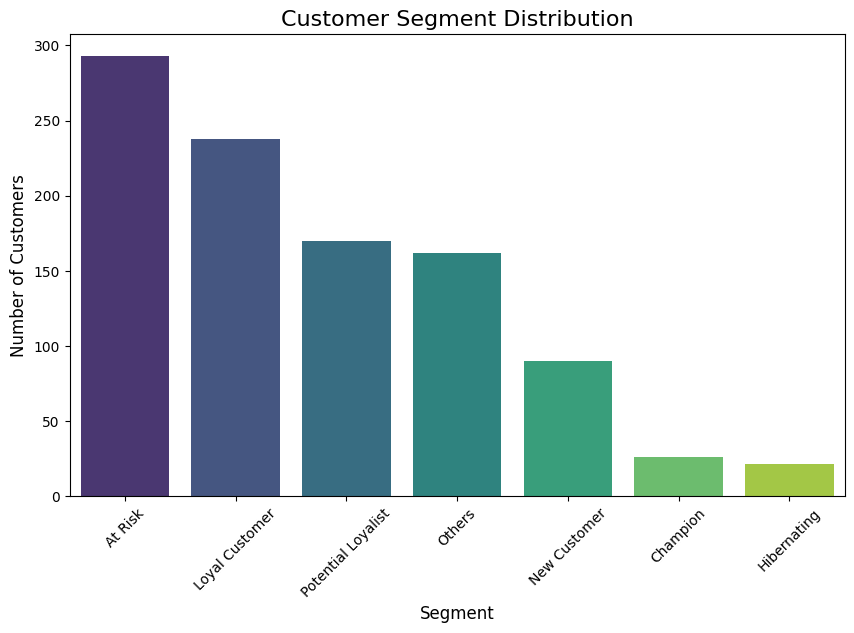

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of customers in each segment
segment_counts = rfm_data['Segment'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")
plt.title('Customer Segment Distribution', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()


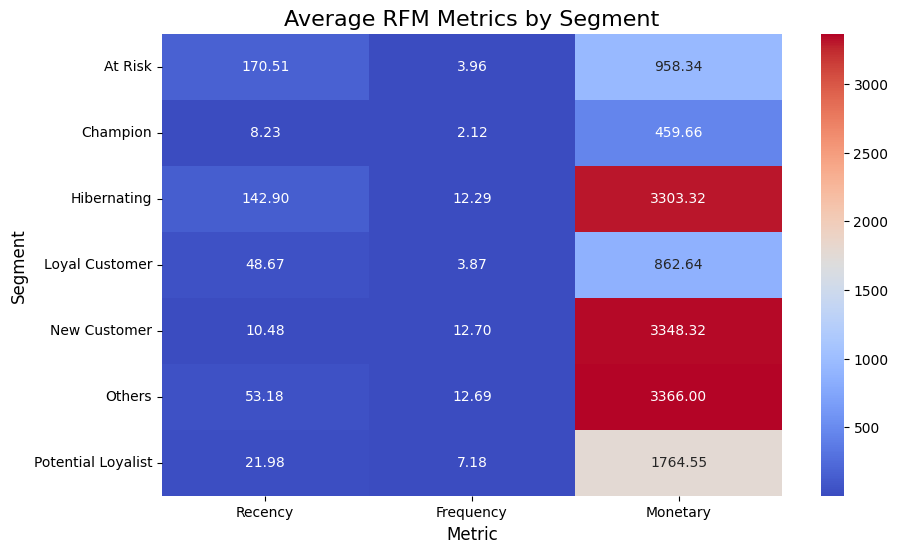

In [19]:
# Calculate average RFM metrics per segment
avg_rfm_per_segment = rfm_data.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()

# Heatmap to visualize
plt.figure(figsize=(10, 6))
sns.heatmap(avg_rfm_per_segment, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average RFM Metrics by Segment', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.show()



In [20]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   object        
 9   InteractionID     6812 non-null   float64       
 10  InteractionDate   6812 non-null   datetime64[ns]
 11  InteractionType   6812 non-null   object        
 12  ResolutionStatus  6812 non-null   object        
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

In [21]:
final_data = merged_data.merge(rfm_data[['CustomerID', 'RFM_Score', 'Segment']], on='CustomerID', how='left')
final_data.head()


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,HasInteraction,RFM_Score,Segment
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0,1,144,At Risk
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1,1,322,Potential Loyalist


In [24]:
final_data.to_csv('Final.csv', index=False)